## Question 1
**What is Boosting in Machine Learning? Explain how it improves weak learners.**

**Answer:**

Boosting is an ensemble technique that sequentially trains a series of weak learners (often shallow decision trees) where each new learner attempts to correct the errors made by the previous learners. The predictions of the weak learners are combined (usually via a weighted sum or majority voting) to form a strong learner.

- The key idea: focus subsequent learners on examples misclassified or with high residual error so that the ensemble reduces both bias and variance.
- Examples: AdaBoost (reweights samples), Gradient Boosting (fits new learners to the negative gradient of loss), XGBoost/LightGBM/CatBoost (optimized, regularized implementations).
- Why it improves weak learners: each learner addresses mistakes of earlier ones; combined, they capture complex patterns that single weak learners cannot.


## Question 2
**What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?**

**Answer:**

- **AdaBoost:** Adjusts sample weights after each weak learner. Misclassified samples receive higher weights so the next learner focuses more on them. Final prediction is a weighted vote of weak learners.
- **Gradient Boosting:** Fits each new learner to the negative gradient (residual errors) of the loss function with respect to the current ensemble predictions. It is framed as numerical optimization in function space.

In short: AdaBoost manipulates sample weights directly; Gradient Boosting optimizes a differentiable loss by fitting residuals.


## Question 3
**How does regularization help in XGBoost?**

**Answer:**

XGBoost includes both L1 (alpha) and L2 (lambda) regularization on leaf weights, along with other regularization strategies (tree depth limits, min_child_weight, subsample, colsample_bytree). Regularization:
- Prevents overfitting by penalizing complex trees and large leaf weights.
- Encourages simpler models that generalize better.
- Combined with shrinkage (learning_rate) and column/row subsampling, it makes boosting more robust on noisy data.


## Question 4
**Why is CatBoost considered efficient for handling categorical data?**

**Answer:**

CatBoost handles categorical features natively without requiring one-hot encoding. It uses techniques like target-based statistics with ordered boosting to avoid target leakage and implements efficient encoding schemes. Benefits:
- Avoids high-dimensional sparse encodings.
- Reduces target leakage using permutations and ordered target statistics.
- Often requires less preprocessing and yields strong baseline performance on datasets with many categorical variables.


## Question 5
**What are some real-world applications where boosting techniques are preferred over bagging methods?**

**Answer:**

Boosting is preferred when strong predictive accuracy is critical and you can tolerate longer training times. Applications include:
- Credit scoring and fraud detection (tabular data with mixed types)
- Click-through rate (CTR) prediction and advertising
- Medical diagnosis where high accuracy is required
- Time series forecasting (with appropriate feature engineering)

Boosting often outperforms bagging (e.g., Random Forests) on structured tabular datasets.


---

# Practical section — Datasets & Experiments

Datasets used:
- Classification: `sklearn.datasets.load_breast_cancer()`
- Regression: `sklearn.datasets.fetch_california_housing()`

The notebook includes code for Q6–Q9 and a pipeline explanation and demo for Q10.

Run cells sequentially to reproduce results.


In [2]:
# Q6-Q9 setup: imports and dataset loading
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
breast = load_breast_cancer()
X_clf = breast.data
y_clf = breast.target

cal = fetch_california_housing()
X_reg = cal.data
y_reg = cal.target

print('Breast cancer shape:', X_clf.shape)
print('California housing shape:', X_reg.shape)


Breast cancer shape: (569, 30)
California housing shape: (20640, 8)


In [3]:
# Q6: Train an AdaBoost Classifier on the Breast Cancer dataset and print accuracy
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.25, stratify=y_clf, random_state=42)

# Scale features (AdaBoost works fine without scaling but it's good practice)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

adb = AdaBoostClassifier(n_estimators=50, random_state=42)
adb.fit(X_train_s, y_train)

y_pred = adb.predict(X_test_s)
acc = accuracy_score(y_test, y_pred)
print('AdaBoost accuracy on Breast Cancer test set: {:.4f}'.format(acc))
print('\nClassification report:')
print(classification_report(y_test, y_pred))


AdaBoost accuracy on Breast Cancer test set: 0.9650

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.96      0.99      0.97        90

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [4]:
# Q7: Train a Gradient Boosting Regressor on the California Housing dataset and evaluate R^2
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)
scaler_r = StandardScaler().fit(X_train_r)
X_train_r_s = scaler_r.transform(X_train_r)
X_test_r_s = scaler_r.transform(X_test_r)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train_r_s, y_train_r)

y_pred_r = gbr.predict(X_test_r_s)
print('Gradient Boosting R^2 on California Housing test set: {:.4f}'.format(r2_score(y_test_r, y_pred_r)))


Gradient Boosting R^2 on California Housing test set: 0.7812


In [7]:
pip install xgboost catboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 5.2 MB/s eta 0:00:14
   - -------------------------------------- 2.9/72.0 MB 10.3 MB/s eta 0:00:07
   --- ------------------------------------ 5.5/72.0 MB 11.0 MB/s eta 0:00:07
   ---- ----------------------------------- 7.9/72.0 MB 11.2 MB/s eta 0:00:06
   ----- ---------------------------------- 10.5/72.0 MB 11.4 MB/s eta 0:00:06
   ------- -------------------------------- 13.1/72.0 MB 11.5 MB/s eta 0:00:06
   -------- ------------------------------- 16.0/72.0 MB 11.7 MB/s eta 0:00:05
   ---------- ----------------------------- 18.4/72.0 MB 11.8 MB/s eta 0:00:05
   ----------- ---------------------------- 21.5/72.0 MB 12.0 MB/s eta 0:00:05
   ------------- -------------------------- 24.1/72.0 MB 12.1 MB/s eta 0:00:04
   --------------- ------------------------ 27.0/72.0 MB 12.2 MB/s 

In [9]:
# Q8: Train an XGBoost Classifier on the Breast Cancer dataset and tune learning_rate using GridSearchCV
# This cell will try to import xgboost; if unavailable, it will print instructions.
try:
    import xgboost as xgb
    from xgboost import XGBClassifier
except Exception as e:
    print('xgboost is not installed or import failed. To run this cell install xgboost: pip install xgboost')
    XGBClassifier = None

if XGBClassifier is not None:
    pipe = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2], 'n_estimators': [50, 100]}
    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_s, y_train)
    print('Best params:', grid.best_params_)
    print('Best CV accuracy: {:.4f}'.format(grid.best_score_))
    best = grid.best_estimator_
    y_pred_xgb = best.predict(X_test_s)
    print('Test accuracy with best XGBoost:', accuracy_score(y_test, y_pred_xgb))


Best params: {'learning_rate': 0.2, 'n_estimators': 50}
Best CV accuracy: 0.9694
Test accuracy with best XGBoost: 0.958041958041958


C:\Users\amitk\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [14:25:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


CatBoost accuracy: 0.965034965034965


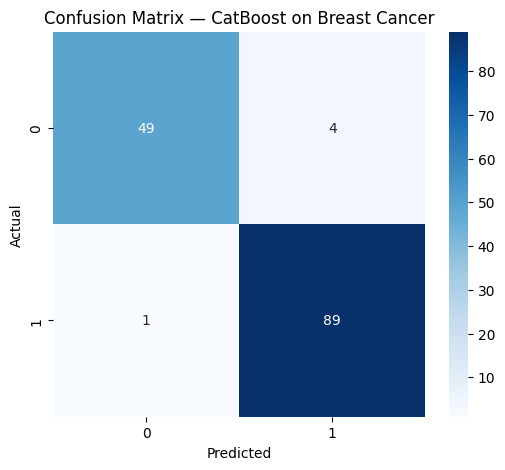

In [10]:
# Q9: Train a CatBoost Classifier and plot confusion matrix using seaborn
try:
    from catboost import CatBoostClassifier
except Exception as e:
    print('catboost is not installed or import failed. To run this cell install catboost: pip install catboost')
    CatBoostClassifier = None

if CatBoostClassifier is not None:
    cbc = CatBoostClassifier(silent=True, random_state=42)
    cbc.fit(X_train_s, y_train)
    y_pred_cbc = cbc.predict(X_test_s)
    print('CatBoost accuracy:', accuracy_score(y_test, y_pred_cbc))
    cm = confusion_matrix(y_test, y_pred_cbc)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix — CatBoost on Breast Cancer')
    plt.show()


## Question 10
**Scenario:** Predict loan default with imbalanced dataset, missing values, numeric & categorical features.

**Step-by-step pipeline (boosting-focused):**

1. **Data preprocessing & handling missing/categorical values**
   - Exploratory Data Analysis: class balance, missingness patterns, feature distributions.
   - Missing values:
     - If missingness is small and random: impute (median for numeric, most-frequent/constant for categorical).
     - If missingness informative: add missing-indicator features.
   - Categorical features:
     - Prefer CatBoost if you have many categorical features — it accepts categorical indices directly.
     - For XGBoost/LightGBM: use target encoding, frequency encoding, or one-hot (careful with cardinality).
   - Feature engineering: create transaction aggregates, recency/frequency features, ratios, behavior summaries.
   - Resampling for imbalance: use class weighting, focal loss, or resampling (SMOTE, ADASYN) — prefer model-aware approaches (class_weight or scale_pos_weight in XGBoost) and careful CV.

2. **Choice between AdaBoost, XGBoost, or CatBoost**
   - **CatBoost:** best if many categorical features, minimal preprocessing, robust default settings.
   - **XGBoost/LightGBM:** highly performant, good for large datasets, offer fine control and regularization.
   - **AdaBoost:** simpler but less flexible on complex imbalanced tabular data; not preferred when data is heavily imbalanced.

3. **Hyperparameter tuning strategy**
   - Use randomized search or Bayesian optimization for efficiency (e.g., Optuna).
   - Important hyperparameters: learning_rate, n_estimators, max_depth, subsample, colsample_bytree, reg_alpha, reg_lambda, scale_pos_weight.
   - Use stratified (group) cross-validation and evaluate with appropriate metrics.

4. **Evaluation metrics & why**
   - For imbalanced classification: use ROC-AUC, PR-AUC (precision-recall AUC), recall, F1-score, and confusion matrix.
   - Business-focused metrics: false negative rate (loan default predicted as non-default) often more costly — use cost-sensitive evaluation and expected monetary loss.

5. **Business benefits**
   - Improved detection of likely defaulters reduces credit losses.
   - Prioritize collections and risk-based pricing.
   - Explainability: feature importance, SHAP values help stakeholders trust model decisions.

**Demo pipeline code (sketch):**


In [11]:
# Demo: sketch pipeline for imbalanced loan-default-like task (synthetic data)
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc

# Synthetic imbalanced dataset
X_syn, y_syn = make_classification(n_samples=2000, n_features=20, n_informative=5, n_redundant=2,
                                   n_classes=2, weights=[0.9, 0.1], flip_y=0.01, random_state=42)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_syn, y_syn, test_size=0.25, stratify=y_syn, random_state=42)

# Simple pipeline with XGBoost if available, else AdaBoost fallback
try:
    from xgboost import XGBClassifier
    clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=(y_train_s==0).sum()/(y_train_s==1).sum())
    print('Using XGBoost in demo pipeline')
except Exception:
    from sklearn.ensemble import AdaBoostClassifier
    clf = AdaBoostClassifier(n_estimators=100, random_state=42)
    print('XGBoost not available — using AdaBoost fallback in demo pipeline')

pipe = Pipeline([('scaler', StandardScaler()), ('clf', clf)])
pipe.fit(X_train_s, y_train_s)

y_proba = pipe.predict_proba(X_test_s)[:,1] if hasattr(pipe.named_steps['clf'], 'predict_proba') else pipe.decision_function(X_test_s)
roc = roc_auc_score(y_test_s, y_proba)
precision, recall, _ = precision_recall_curve(y_test_s, y_proba)
pr_auc = auc(recall, precision)
print('Demo ROC-AUC: {:.4f}, PR-AUC: {:.4f}'.format(roc, pr_auc))


Using XGBoost in demo pipeline


C:\Users\amitk\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:199: UserWarning: [14:25:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Demo ROC-AUC: 0.9327, PR-AUC: 0.8130
